                                EN3160 Assignment 1 on Intensity Transformations and Neighborhood
                                                        Filtering

INDEX NO : 200556L                                                                          
NAME : S.M.R.K.SAMARAKOON

Question 1

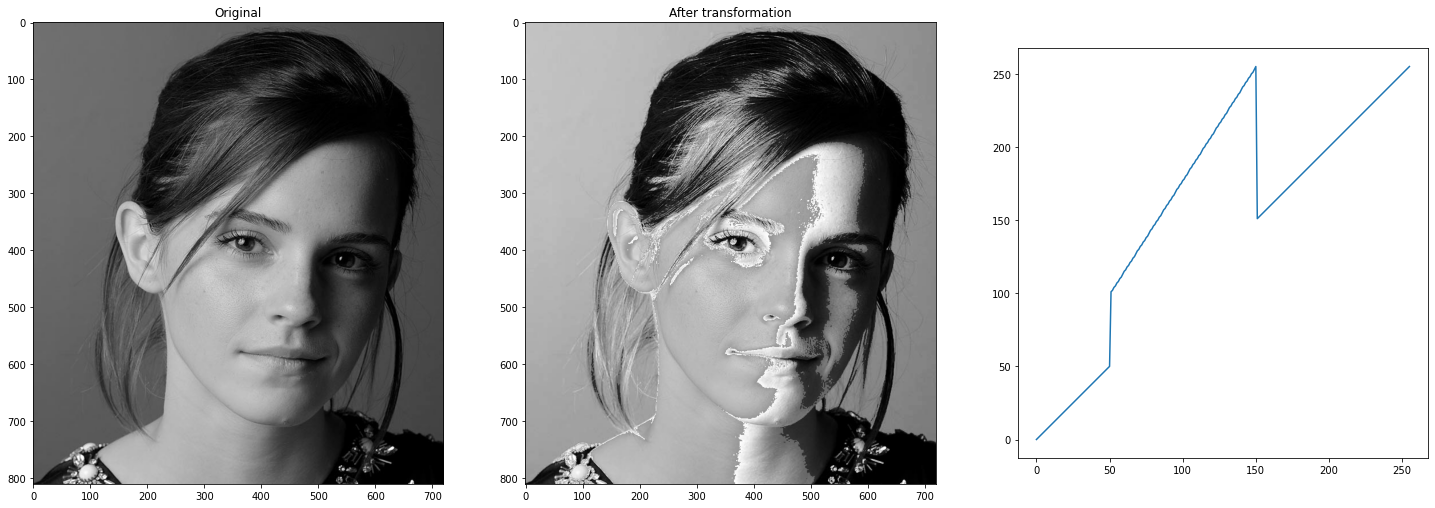

In [10]:
# Intensity Windowing

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Load original image
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

c = np.array([(50, 50),(50,100),(150,255),(150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

# Apply the transformation and display the transformed image
image_transformed = cv.LUT(img_orig, transform)


assert len(transform)==256
image_original = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
image_trans = cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB)

# Plot the original and transformed image
fig, ax = plt.subplots(1,3, figsize = (25,25))
ax[0].imshow(image_original)
ax[1].imshow(image_trans)
ax[0].set_title('Original')
ax[1].set_title('After transformation')
ax[2].plot(transform)
ax[2].set_aspect('equal')
plt.show()





Question 2


(a) White matter

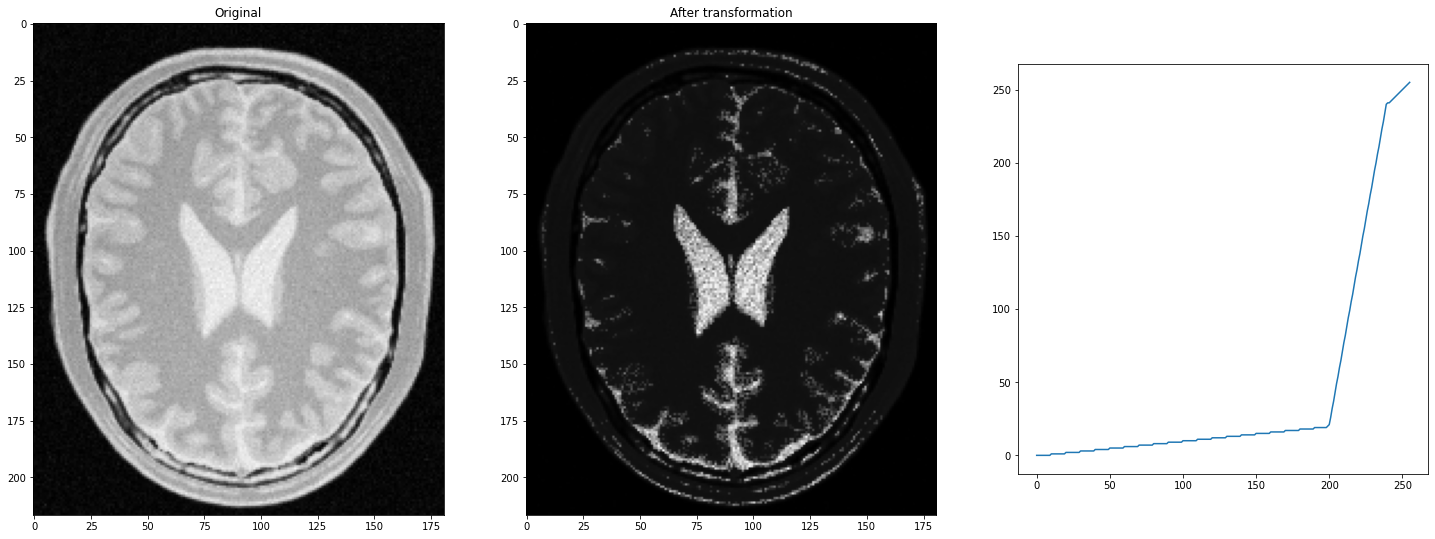

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image
img_orig = cv.imread('images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

# Create a transformation function
t1 = np.linspace(0, 20, 200).astype('uint8')
t2 = np.linspace(21, 240, 40).astype('uint8')
t3 = np.linspace(241, 255, 16).astype('uint8')
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

# Apply the transformation and display the transformed image
image_transformation = cv.LUT(img_orig, transform)

# Convert the images to RGB for display
image_original = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
image_transformed = cv.cvtColor(image_transformation, cv.COLOR_BGR2RGB)


# Plot the original and transformed image
fig, ax = plt.subplots(1,3, figsize = (25,25))
ax[0].imshow(image_original)
ax[1].imshow(image_transformed)
ax[0].set_title('Original')
ax[1].set_title('After transformation')
ax[2].plot(transform)
ax[2].set_aspect('equal')
plt.show()


(b) Gray matter

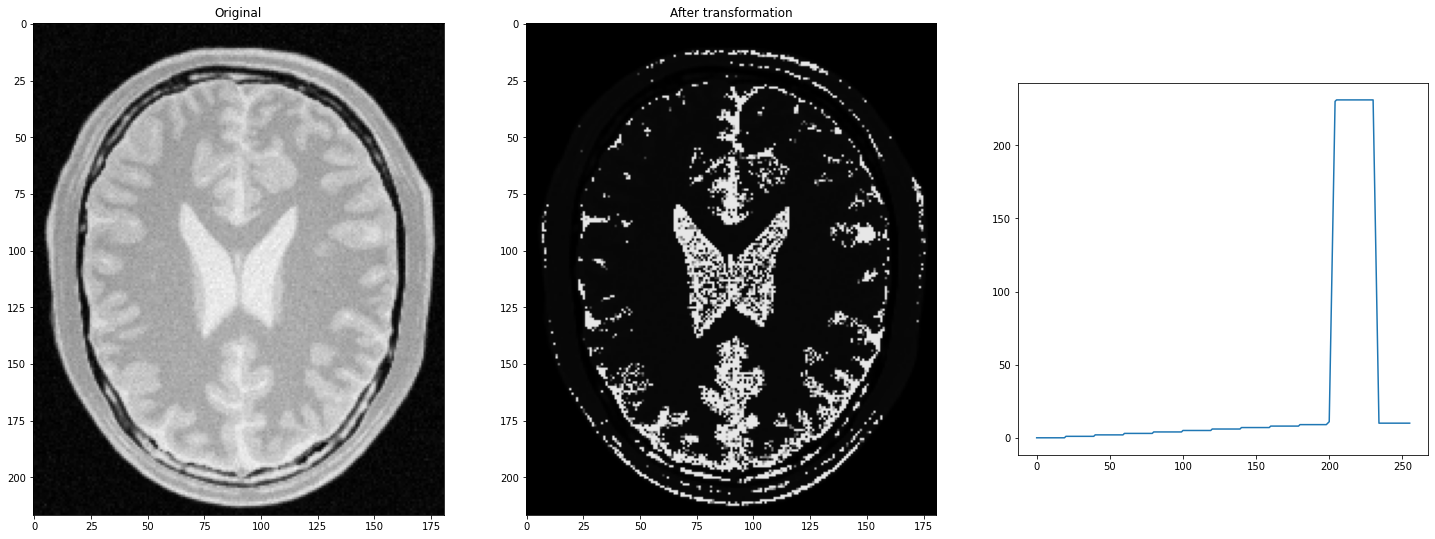

In [14]:


# Create a transformation function
t1 = np.linspace(0,10,200).astype('uint8')
t2 = np.linspace(11,230,5).astype('uint8')
t3 = np.linspace(231,231,25).astype('uint8')
t4 = np.linspace(231,10,5).astype('uint8')
t5 = np.linspace(10,10,21).astype('uint8')
transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')

# Apply the transformation and display the transformed image
image_transformation = cv.LUT(img_orig, transform)

# Convert the images to RGB for display
image_original = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
image_transformed = cv.cvtColor(image_transformation, cv.COLOR_BGR2RGB)


# Plot the original and transformed image
fig, ax = plt.subplots(1,3, figsize = (25,25))
ax[0].imshow(image_original)
ax[1].imshow(image_transformed)
ax[0].set_title('Original')
ax[1].set_title('After transformation')
ax[2].plot(transform)
ax[2].set_aspect('equal')
plt.show()

Question 3

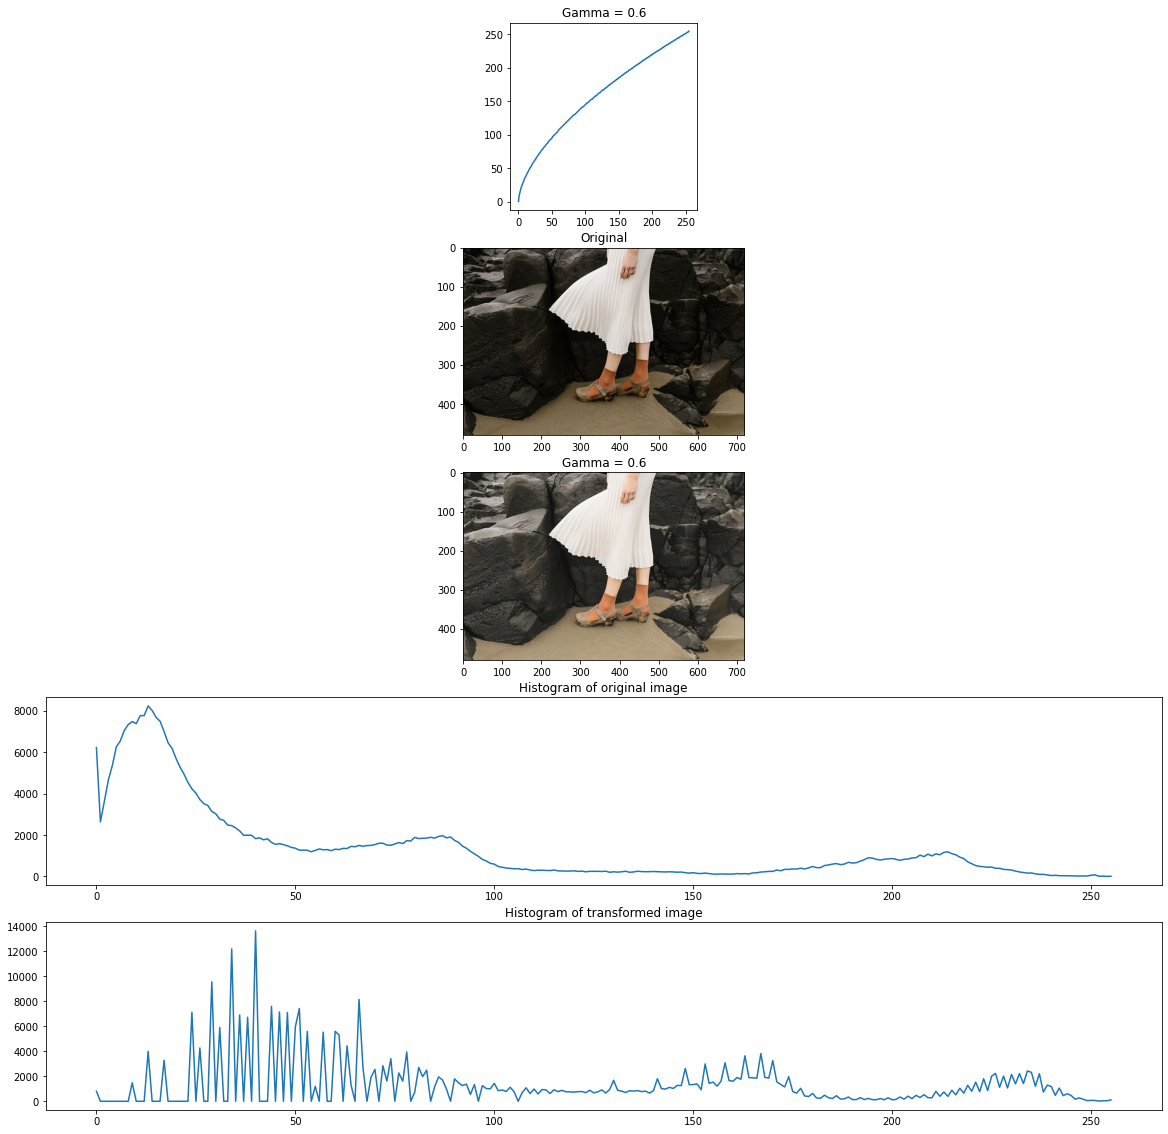

In [34]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = cv.imread('images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img is not None

# Convert the image to LAB
img_trans = cv.cvtColor(img, cv.COLOR_BGR2LAB)

gamma = [0.6]

for k in gamma:
    transform = np.array([(p/255)**k*255 for p in range(0,256)]).astype(np.uint8)
    img_trans[:,:,0]  = cv.LUT(img_trans[:,:,0],transform)
    imgOriginal = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgTransformed = cv.cvtColor(img_trans, cv.COLOR_LAB2RGB)

    # Plot the original and transformed image
    fig, ax = plt.subplots(5,1, figsize = (20,20))
    ax[0].plot(transform)
    ax[0].set_title('Gamma = %s'%k)
    ax[0].set_aspect('equal')
    ax[1].imshow(imgOriginal)
    ax[2].imshow(imgTransformed)
    ax[1].set_title('Original')
    ax[2].set_title('Gamma = %s'%k)
    hist_img1 = cv.calcHist([img],[0],None,[256],[0,256])
    hist_img2 = cv.calcHist([img_trans],[0],None,[256],[0,256])
    ax[3].set_title('Histogram of original image')
    ax[3].plot(hist_img1)
    ax[4].set_title('Histogram of transformed image')
    ax[4].plot(hist_img2)

plt.show()


Question 5


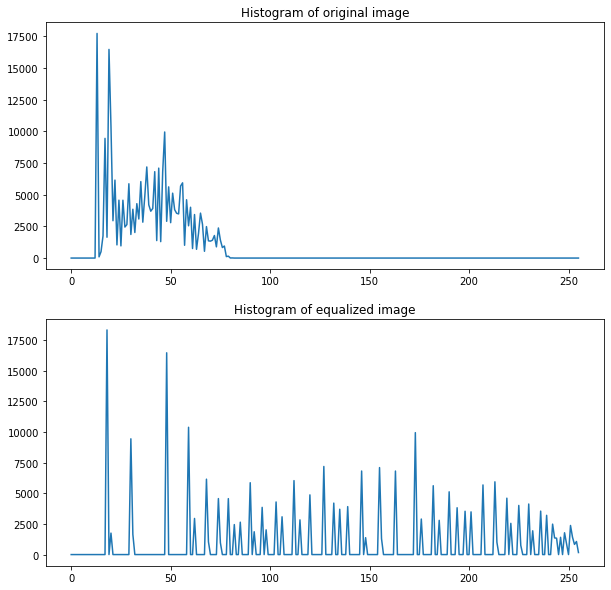

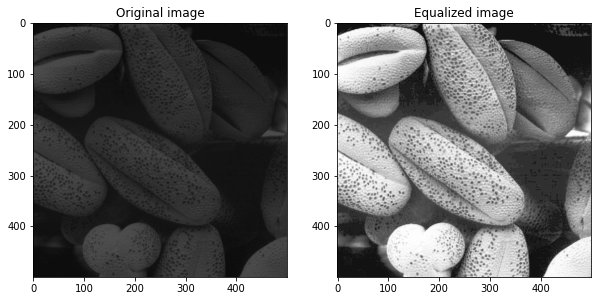

In [38]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plts

# Load the image
img = cv.imread('images/shells.png', cv.IMREAD_GRAYSCALE)
assert img is not None

# Create a transformation function
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)


fig, ax = plt.subplots(2,1, figsize = (10,10))
hist , bins = np.histogram(img.ravel() , 256 , [0,256])
ax[0].set_title('Histogram of original image')
ax[0].plot(hist)

EqualizeMap = []
sum1 = 0
for i in range(len(bins)-1):
    sum1 += hist[i]
    a = int(round(sum1*255/(img.shape[0]*img.shape[1]),1))
    EqualizeMap.append(a)
    
EqualizedImage = cv.LUT(img,np.array(EqualizeMap).astype(np.uint8))
imgConverted2 = cv.cvtColor(EqualizedImage, cv.COLOR_BGR2RGB)

hist_equalized , bins_equalized = np.histogram(EqualizedImage.ravel() , 256 , [0,256])
ax[1].set_title('Histogram of equalized image')
ax[1].plot(hist_equalized)
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].set_title('Original image')
ax[0].imshow(imgConverted)
ax[1].set_title('Equalized image')
ax[1].imshow(imgConverted2)